In [1]:
#importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Preprocessing 

In [3]:
#importing the dataset
dataset=pd.read_csv('Adult_Dataset.csv')

In [4]:
#Converting the target value of the dataset from string to binary class i.e 0 and 1 
dataset.loc[dataset['Target']==' <=50K','Target']=0
dataset.loc[dataset['Target']==' <=50K.','Target']=0
dataset.loc[dataset['Target']==' >50K','Target']=1
dataset.loc[dataset['Target']==' >50K.','Target']=1

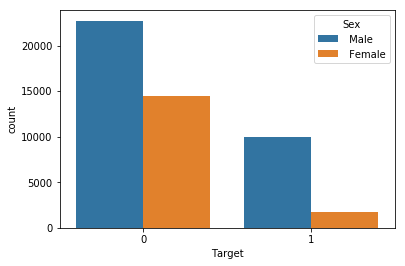

In [5]:
#Visualising the new target column of our dataset
sns.countplot(dataset['Target'],hue=dataset['Sex'])

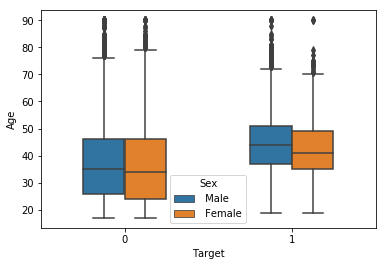

In [12]:
sns.boxplot(dataset['Target'],dataset['Age'],hue=dataset['Sex'],width=0.5)

In [7]:
#Checking the info the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
Age                48842 non-null int64
Workclass          48842 non-null object
Fnlwgt             48842 non-null int64
Education          48842 non-null object
Education-num      48842 non-null int64
Martial-Status     48842 non-null object
Occupation         48842 non-null object
Relationship       48842 non-null object
Race               48842 non-null object
Sex                48842 non-null object
Captial-gain       48842 non-null int64
Captial-loss       48842 non-null int64
Hours-per-weeks    48842 non-null int64
Native-Contry      48842 non-null object
Target             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [14]:
#Converting the Categorical features 
new_Dataset=pd.get_dummies(dataset,columns=['Workclass','Martial-Status','Relationship','Race','Sex'],drop_first=True)

In [15]:
#Checking the info the dataset
new_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 34 columns):
Age                                      48842 non-null int64
Fnlwgt                                   48842 non-null int64
Education                                48842 non-null object
Education-num                            48842 non-null int64
Occupation                               48842 non-null object
Captial-gain                             48842 non-null int64
Captial-loss                             48842 non-null int64
Hours-per-weeks                          48842 non-null int64
Native-Contry                            48842 non-null object
Target                                   48842 non-null int64
Workclass_ Federal-gov                   48842 non-null uint8
Workclass_ Local-gov                     48842 non-null uint8
Workclass_ Never-worked                  48842 non-null uint8
Workclass_ Private                       48842 non-null uint8
Workclass_ Self-emp-

In [16]:
#Dividing the Dataset into X and y 
X=new_Dataset.drop(['Target','Native-Contry','Education','Occupation'],axis=1) 
y=new_Dataset['Target']

In [17]:
#Deciding on which column will contribute in the output
from statsmodels.formula.api import OLS
X_optimal=X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
model_ols=OLS(endog=y,exog= X_optimal.astype(float)).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1613.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:03:11   Log-Likelihood:                -17558.
No. Observations:               48842   AIC:                         3.518e+04
Df Residuals:                   48812   BIC:                         3.544e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [18]:
X_optimal=X.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
model_ols=OLS(endog=y,exog= X_optimal.astype(float)).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1669.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:03:18   Log-Likelihood:                -17558.
No. Observations:               48842   AIC:                         3.517e+04
Df Residuals:                   48813   BIC:                         3.543e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [19]:
#Dividing the Dataset after applying OLS into X and y 
X=new_Dataset.drop(['Target','Native-Contry','Education','Occupation','Workclass_ Never-worked'],axis=1) 
y=new_Dataset['Target']

In [20]:
#Dividing into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [22]:
#Importing the libraries required for the ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [24]:
#Intialising the model 
model=Sequential()

In [25]:
#First layer of our Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim=29))
#Second layer of our Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu'))
#Third layer of our Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu'))
#Fourth Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu'))

In [26]:
#The output layer 
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [27]:
#Compiling the Model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
#Fitting the model to data and target data 
model.fit(X_train,y_train,batch_size=10,epochs=100)


Epoch 1/100
32724/32724 [==============================] - 4s 126us/step - loss: 0.3608 - acc: 0.8340
Epoch 2/100
32724/32724 [==============================] - 4s 125us/step - loss: 0.3249 - acc: 0.8506
Epoch 3/100
32724/32724 [==============================] - 4s 108us/step - loss: 0.3216 - acc: 0.8502
Epoch 4/100
32724/32724 [==============================] - 4s 107us/step - loss: 0.3194 - acc: 0.8517
Epoch 5/100
32724/32724 [==============================] - 3s 90us/step - loss: 0.3180 - acc: 0.8512
Epoch 6/100
32724/32724 [==============================] - 4s 107us/step - loss: 0.3173 - acc: 0.8522
Epoch 7/100
32724/32724 [==============================] - 4s 112us/step - loss: 0.3167 - acc: 0.8523
Epoch 8/100
32724/32724 [==============================] - 3s 87us/step - loss: 0.3169 - acc: 0.8528
Epoch 9/100
32724/32724 [==============================] - 3s 88us/step - loss: 0.3161 - acc: 0.8538
Epoch 10/100
32724/32724 [==============================] - 3s 88us/step - loss: 0.31

32724/32724 [==============================] - 4s 124us/step - loss: 0.3011 - acc: 0.8585
Epoch 81/100
32724/32724 [==============================] - 4s 112us/step - loss: 0.3013 - acc: 0.8579
Epoch 82/100
32724/32724 [==============================] - 3s 106us/step - loss: 0.3010 - acc: 0.8576
Epoch 83/100
32724/32724 [==============================] - 3s 103us/step - loss: 0.3007 - acc: 0.8580
Epoch 84/100
32724/32724 [==============================] - 5s 156us/step - loss: 0.3006 - acc: 0.8579
Epoch 85/100
32724/32724 [==============================] - 4s 125us/step - loss: 0.3006 - acc: 0.8574
Epoch 86/100
32724/32724 [==============================] - 5s 141us/step - loss: 0.3004 - acc: 0.8585
Epoch 87/100
32724/32724 [==============================] - 6s 190us/step - loss: 0.3004 - acc: 0.8585
Epoch 88/100
32724/32724 [==============================] - 4s 112us/step - loss: 0.3000 - acc: 0.8584
Epoch 89/100
32724/32724 [==============================] - 3s 95us/step - loss: 0.300

In [29]:
#Making Predictions with our Model 
prediction =model.predict(X_test)

In [30]:
prediction=(prediction>0.5)

In [36]:
#Evaluating the performance of our model 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12278
           1       0.73      0.58      0.65      3840

   micro avg       0.85      0.85      0.85     16118
   macro avg       0.80      0.76      0.77     16118
weighted avg       0.84      0.85      0.84     16118



In [38]:
print(confusion_matrix(y_test,prediction))

[[11442   836]
 [ 1608  2232]]


In [39]:
print(accuracy_score(y_test,prediction))

0.8483682839061918
